In [1]:
from pysymbolic.algorithms.symbolic_metamodeling import *
import numpy as np
import pandas as pd

In [2]:
path = './'
file_name = 'COVID_V7.xlsx'
full_file_path = path + file_name

In [3]:
#from preprocess import clean_data
all_data = pd.read_excel(full_file_path, sheet_name='Sheet1')
print('all_data len:', len(all_data.index))
print('all_data columns len:', len(all_data.columns))

all_data len: 538
all_data columns len: 26


In [4]:
col_type_dict = {'Age':True, 'SEX':True, 'BMI':False, 'Prior_Co1':True, 'Prior_Co2':True, 'Prior_Co3':True, 'Prior_Co6':True,
       'Prior_Co24':True, 'Alco':True, 'Smoke':True, 'SYMP1':True, 'SYMP2':True, 'SYMP3':True, 'SYMP5':True,
       'SYMP6':True, 'SYMP11':True, 'SYMP12':True, 'SYMP20':True, 'SPO':False, 'WBC':False, 'Hgb':False,
       'Hct':False, 'MCV':False, 'Plate':False, 'Neutro':False, 'Lymp':False, 'DIMER':True, 'Glucose':True, 'BUN':True,
       'CR':False, 'GFR_BIN':True, 'AKI':True, 'NA_I':True, 'K_I':False, 'BIC':False, 'ALB_I':False, 'TBILI':False, 'ALK_I':True,
       'ALT_I':True, 'AST_I':True, 'Trop_BIN':True, 'CRP':False, 'CXR2':True, 'CXR6':True, 'CXR7':True, 'EKG':True,
       'SEVER':True, 'RACE_E':True, 'LENG':True, 'LENG_ICU':True, 'Mech':True, 'DIED':True, 'ICU':True}

(array([472.,  13.,  15.,   7.,   7.,   0.,   1.,   4.,   1.,  18.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <a list of 10 Patch objects>)

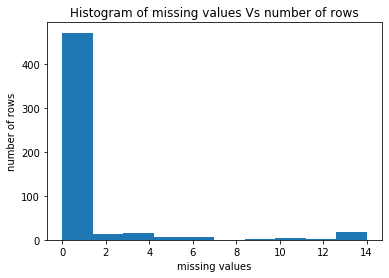

In [5]:
import matplotlib.pyplot as plt
tgt_col='SEVER'
died_col = 'DIED'
icu_col = 'ICU'
sever_col = 'SEVER'
mech_col = 'Mech'
leng_col = 'LENG'
leng_icu_col = 'LENG_ICU'
#spol_col = 'SPO'
#result_cols = [died_col, icu_col, sever_col, mech_col, leng_col, leng_icu_col, spol_col]
result_cols = [died_col, icu_col, sever_col, mech_col, leng_col, leng_icu_col]
result_cols.remove(tgt_col)
features = np.setdiff1d(all_data.columns,  result_cols).tolist()
all_data = all_data[features]



plt.xlabel('missing values')
plt.ylabel('number of rows')
plt.title('Histogram of missing values Vs number of rows' )
plt.hist(all_data.isnull().sum(axis=1).tolist())


In [6]:
thresh3_val = 0
df = all_data[all_data.isnull().sum(axis=1) > thresh3_val ].index
print('len df', len(df))
all_data.drop(all_data.index[df], inplace=True)
all_data.reset_index(drop=True, inplace=True)

len df 146


In [7]:
all_data['EKG']

0      422.0
1      448.0
2      385.0
3      449.0
4      544.0
       ...  
387    439.0
388    444.0
389    421.0
390    453.0
391    423.0
Name: EKG, Length: 392, dtype: float64

In [8]:
all_data
normalization_not_required = {'Age':False, 'SEX':True, 'BMI':False, 'Prior_Co1':True, 'Prior_Co2':True, 'Prior_Co3':True, 'Prior_Co6':True,
       'Prior_Co24':True, 'Alco':True, 'Smoke':True, 'SYMP1':True, 'SYMP2':True, 'SYMP3':True, 'SYMP5':True,
       'SYMP6':True, 'SYMP11':True, 'SYMP12':True, 'SYMP20':True, 'SPO':False, 'WBC':False, 'Hgb':False,
       'Hct':False, 'MCV':False, 'Plate':False, 'Neutro':False, 'Lymp':False, 'DIMER':False, 'Glucose':False, 'BUN':False,
       'CR':False, 'GFR_BIN':True, 'AKI':True, 'NA_I':False, 'K_I':False, 'BIC':False, 'ALB_I':False, 'TBILI':False, 'ALK_I':False,
       'ALT_I':False, 'AST_I':False, 'Trop_BIN':True, 'CRP':False, 'CXR2':True, 'CXR6':True, 'CXR7':True, 'EKG':False,
       'SEVER':True, 'RACE_E':False, 'LENG':True, 'LENG_ICU':True, 'Mech':True, 'DIED':True, 'ICU':True}

In [9]:
from sklearn.preprocessing import MinMaxScaler
# normalize the features
scale_feas = []
for col in all_data.columns:
    if normalization_not_required[col] is False:
        scale_feas.append(col)
#print(scale_feas)
all_data_temp = all_data.copy()
features = all_data_temp[scale_feas]
#scaler = StandardScaler().fit(features.values)
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
all_data[scale_feas] = features
#print(all_data)

In [10]:
len(all_data.index)
all_data

,AKI,ALB_I,ALK_I,AST_I,Age,BUN,CR,CXR2,DIMER,EKG,...,Glucose,Hct,MCV,NA_I,Prior_Co1,RACE_E,SEVER,SYMP20,TBILI,WBC
0,1.0,0.101010,0.037202,0.008299,0.395062,0.350649,0.186335,1,0.013409,0.095002,...,0.029436,0.356061,0.511078,0.322034,1,1.000000,1,0,0.057143,0.128114
1,1.0,0.117845,0.089286,0.048409,0.666667,0.311688,0.099379,0,0.001759,0.100855,...,0.061325,0.553030,0.604136,0.237288,1,1.000000,1,0,0.085714,0.106762
2,1.0,0.094276,0.037202,0.134855,0.802469,0.142857,0.062112,1,0.009140,0.086673,...,0.026165,0.608586,0.562777,0.322034,1,1.000000,1,0,0.057143,0.252669
3,1.0,0.090909,0.043155,0.017981,0.777778,0.064935,0.043478,0,0.012345,0.101081,...,0.031889,0.530303,0.638109,0.203390,1,0.000000,1,0,0.142857,0.405694
4,1.0,0.114478,0.241071,0.168050,0.604938,0.032468,0.043478,1,0.005723,0.122467,...,0.024530,0.141414,0.379616,0.254237,0,1.000000,1,0,1.000000,0.060498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,1.0,0.097643,0.110119,0.015214,0.543210,0.402597,0.298137,0,0.005833,0.098829,...,0.080131,0.381313,0.601182,0.288136,1,0.000000,0,0,0.028571,0.170819
388,0.0,0.107744,0.035714,0.035961,0.518519,0.019481,0.031056,1,0.003589,0.099955,...,0.053148,0.530303,0.567208,0.305085,1,0.666667,0,0,0.057143,0.185053
389,0.0,0.084175,0.071429,0.023513,0.901235,0.123377,0.062112,1,0.062618,0.094777,...,0.088307,0.454545,0.552437,0.288136,1,0.000000,0,0,0.085714,0.160142
390,0.0,0.101010,0.110119,0.004841,0.506173,0.045455,0.024845,1,0.001830,0.101981,...,0.225675,0.631313,0.542097,0.372881,0,0.000000,0,0,0.200000,0.252669


In [11]:
len(all_data.columns)

21

In [12]:
writer = pd.ExcelWriter('COVID_V8.xlsx')
all_data.to_excel(writer, sheet_name='Sheet1', index=False)
writer.save()

In [13]:
y = all_data[tgt_col].copy()
all_data.drop(columns=[tgt_col], inplace=True)
X = all_data.copy()

In [14]:
from sklearn.model_selection import train_test_split
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [15]:
len(X_train)

274

In [16]:
from sklearn.neural_network import MLPRegressor

In [17]:
model = MLPRegressor(max_iter=1000)
model.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [18]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

'''
data          = pd.read_csv("data/absenteeism.csv", delimiter=';')

feature_names = ['Transportation expense', 'Distance from Residence to Work',
                 'Service time', 'Age', 'Work load Average/day ', 'Hit target',
                 'Disciplinary failure', 'Education', 'Son', 'Social drinker',
                 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']

scaler        = MinMaxScaler(feature_range=(0, 1))
X             = scaler.fit_transform(data[feature_names])
Y             = ((data['Absenteeism time in hours'] > 4) * 1) 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
'''
model         = XGBClassifier()

model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

Let us examine the AUC-ROC performance of the fitted XGBoost model on the test data

In [19]:
roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])

0.8196778711484594

Now let us create a symbolic metamodel instance. This takes the fitted model **model** and the training features **X_train** as follows

In [21]:
metamodel = symbolic_metamodel(model, X_train)

metamodel.fit(num_iter=10, batch_size=X_train.shape[0], learning_rate=.01)

---- Tuning the basis functions ----



----  Optimizing the metamodel  ----


Now let us see how this metamodel performs using the **evaluate** method...

In [22]:
Y_metamodel = metamodel.evaluate(X_test)

roc_auc_score(Y_test, Y_metamodel)

0.7514005602240896

It performs close to the original XGBoost model! Now let us see the exact symbolic equation of the model in terms of Meijer-G functions

By invoking the **.fit()** method in the **symbolic_metamodel** class, we essentially transform the XGBoost model to a space of interpretable symbolic equations as shown in the Figure below, without much loss in predictive accuracy. 

<img src="images/FigB2.png" width="320"/>

Now we show how to extract the exact and approximate equation $g(x)$ from the metamodel class...

In [23]:
metamodel.exact_expression

1/(exp(-0.0196258473697001*re(X0**2.18235949200672*hyper((1.0, 1.0), (2.25688993743311,), 0.220282755075316*X0*exp_polar(I*pi))) - 0.000123796473322882*re(X1**2.52250119536324*hyper((1.0, 1.0), (2.64635542760424,), 0.154025686146726*X1*exp_polar(I*pi))) - 0.00943580270471118*re(X11**2.53947543012199*hyper((1.0, 1.0), (2.64551548284271,), 0.431661491518968*X11*exp_polar(I*pi))) - 9.44861756089406e-20*re(X12**2.35424912481973*hyper((1.0, 1.0), (2.470441074678,), 6.33139680744989e-5*X12*exp_polar(I*pi))) - 5.35698528802525e-20*re(X13**2.35902642116813*hyper((1.0, 1.0), (2.47575251848017,), 7.36800913778118e-5*X13*exp_polar(I*pi))) + 4.21072208633872e-10*re(X14**2.48641082107784*hyper((1.0, 1.0), (2.61224958008481,), 0.0108194785470753*X14*exp_polar(I*pi))) - 6.03864688738545e-22*re(X16**2.30098844426591*hyper((1.0, 1.0), (2.4055904911827,), 1.48146417179392e-5*X16*exp_polar(I*pi))) + 4.50892603136586e-14*re(X17**2.213266977016*hyper((1.0, 1.0), (2.29550426699466,), 0.00114076278868183*X17

Because this equation involves Hypergeometric functions, we might prefer to work with the polynomial approximation...

In [24]:
metamodel.approx_expression

1/(14.0210932200166*exp(0.413545642799709*X0**3*X1**3 - 0.0315907375334982*X0**3*X10**3 + 0.129776439375461*X0**3*X11**3 + 0.0862613201190399*X0**3*X12**3 + 0.0910453552843781*X0**3*X13**3 + 0.266506600332646*X0**3*X14**3 - 0.0371569174525707*X0**3*X15**3 + 0.0576116635312745*X0**3*X16**3 - 0.0329705346357533*X0**3*X17**3 + 0.0231597390886027*X0**3*X18**3 - 0.0716853999945646*X0**3*X19**3 - 0.111527925241405*X0**3*X2**3 - 0.0498016579566518*X0**3*X3**3 - 0.0223826827035112*X0**3*X4**3 - 0.106776127543977*X0**3*X5**3 + 0.0812699116491364*X0**3*X6**3 + 0.0367488320721435*X0**3*X7**3 + 0.0469243779038286*X0**3*X8**3 + 0.355050534893921*X0**3*X9**3 - 0.000867702244736045*X0**3 - 0.183826404895062*X0**2*X1**2 + 0.0169667566905229*X0**2*X10**2 - 0.0561439782289651*X0**2*X11**2 - 0.0519069222561799*X0**2*X12**2 - 0.0451731031795968*X0**2*X13**2 - 0.129061436698867*X0**2*X14**2 + 0.0208178714152486*X0**2*X15**2 - 0.0261763967668976*X0**2*X16**2 + 0.0105312274657035*X0**2*X17**2 - 0.01056104594

In [30]:
from sympy.printing.latex import latex
latex(metamodel.approx_expression)

'\\frac{1}{14.0210932200166 e^{0.413545642799709 X_{0}^{3} X_{1}^{3} - 0.0315907375334982 X_{0}^{3} X_{10}^{3} + 0.129776439375461 X_{0}^{3} X_{11}^{3} + 0.0862613201190399 X_{0}^{3} X_{12}^{3} + 0.0910453552843781 X_{0}^{3} X_{13}^{3} + 0.266506600332646 X_{0}^{3} X_{14}^{3} - 0.0371569174525707 X_{0}^{3} X_{15}^{3} + 0.0576116635312745 X_{0}^{3} X_{16}^{3} - 0.0329705346357533 X_{0}^{3} X_{17}^{3} + 0.0231597390886027 X_{0}^{3} X_{18}^{3} - 0.0716853999945646 X_{0}^{3} X_{19}^{3} - 0.111527925241405 X_{0}^{3} X_{2}^{3} - 0.0498016579566518 X_{0}^{3} X_{3}^{3} - 0.0223826827035112 X_{0}^{3} X_{4}^{3} - 0.106776127543977 X_{0}^{3} X_{5}^{3} + 0.0812699116491364 X_{0}^{3} X_{6}^{3} + 0.0367488320721435 X_{0}^{3} X_{7}^{3} + 0.0469243779038286 X_{0}^{3} X_{8}^{3} + 0.355050534893921 X_{0}^{3} X_{9}^{3} - 0.000867702244736045 X_{0}^{3} - 0.183826404895062 X_{0}^{2} X_{1}^{2} + 0.0169667566905229 X_{0}^{2} X_{10}^{2} - 0.0561439782289651 X_{0}^{2} X_{11}^{2} - 0.0519069222561799 X_{0}^{2} 

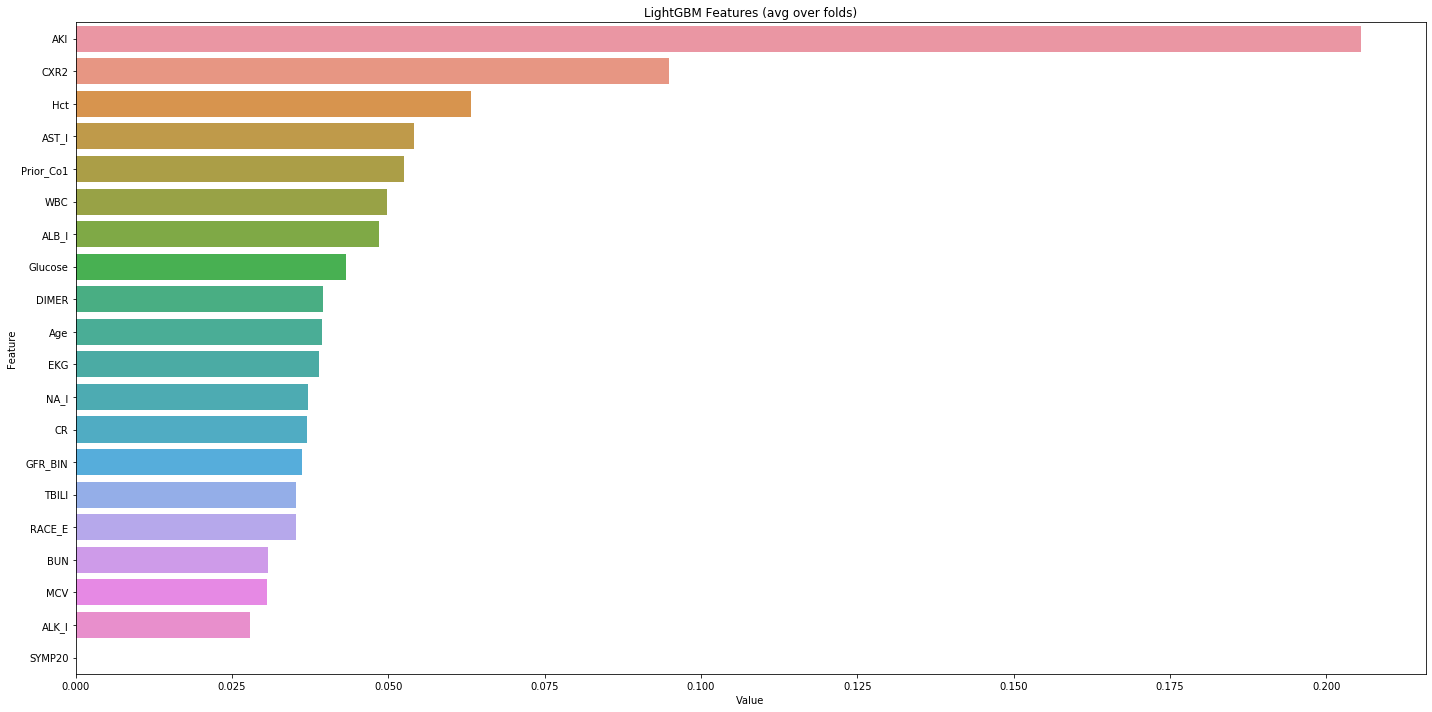

<Figure size 432x288 with 0 Axes>

In [25]:
# code reference from https://www.kaggle.com/ashishpatel26/feature-importance-of-lightgbm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [26]:
all_data.columns

Index(['AKI', 'ALB_I', 'ALK_I', 'AST_I', 'Age', 'BUN', 'CR', 'CXR2', 'DIMER',
       'EKG', 'GFR_BIN', 'Glucose', 'Hct', 'MCV', 'NA_I', 'Prior_Co1',
       'RACE_E', 'SYMP20', 'TBILI', 'WBC'],
      dtype='object')